# Project: Vizualization - [Auto-mpg data]
### This notebook is for educational purpose . in this notebook we will do some visualization

## Introduction

### Dataset Description 

> i will go through Alcohol Consumption data, this data has:
- mpg: Miles per gallon the primary measurement of a car's fuel efficiency (continuous)
- cylinders: Number of cylinders in the engine (multi-valued discrete)
- displacement: The combined swept volume of the pistons inside the cylinders of an engine in cubic inches (continuous)
- horsepower: The metric used to indicate the power produced by a car's engine. (continuous)
- weight: vehicle weight in lbs (continuous)
- acceleration: Time to accelerate from O to 60 mph in sec (continuous)
- model year: Year of manufacture (multi-valued discrete)
- origin: origin of car [1. American, 2. European,3. Japanese] (multi-valued discrete)
- car name: string (unique for each instance)

> Missing Attribute Values: horsepower has 6 missing values

<h1 align='center'><font color='brown'> Import Libraries, Functions and Data</font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("auto-mpg.csv")
pd.set_option('display.max_columns', None)

## Data Wrangling



### General Properties

In [2]:
df.shape

(398, 9)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [6]:
df.duplicated().sum()

0

>Above data has:
- 9 columns and almost 400 rows.
- Data has zero duplicate.
- `horsepower` has 6 missing values "?".
- 3 columns are multivalued discrete [cylinders, model year, origin] and the other 5 are continuous.

<h1 align='center'><font color='brown'> Cleaning </font> 

### Due to the number of unique values in `car name` column (305) and it's a string value. I think it's better to drop it as it won't be really helpful.

In [7]:
df.drop("car name", axis="columns", inplace=True)

### Cleaning `horsepower` column

In [8]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [9]:
df['horsepower'] = df['horsepower'].astype(float)

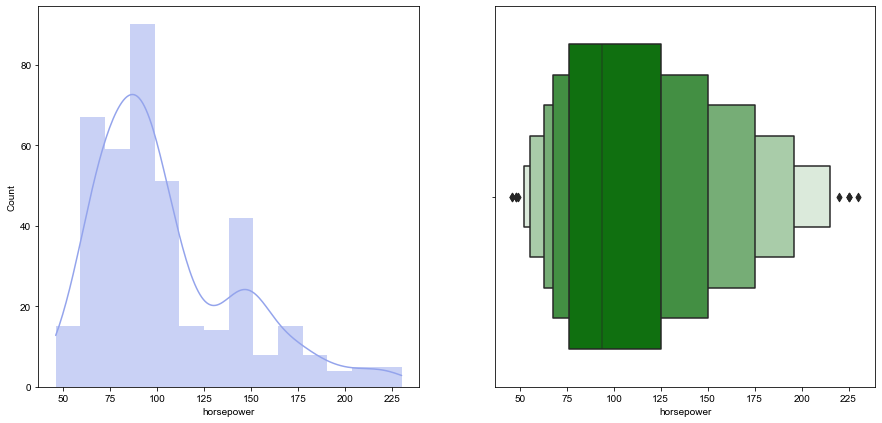

In [37]:
fig, ax =plt.subplots(1,2, figsize=(15,7))
sns.set_style("whitegrid")
sns.histplot(data=df, x='horsepower', kde=True, color='#94A4EC', linewidth=0, ax=ax[0])
sns.boxenplot(x='horsepower', color="g", scale="linear", data=df, width = .8, ax=ax[1]);

> The distribution is left skewed so  it's better to replace `Nan` values with the `median`

In [11]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [12]:
df['horsepower'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

### Cleaning `origin` column

In [13]:
df['origin'] = df['origin'].replace([1, 2, 3], ['American', 'European', 'Japanese'])

In [14]:
df['origin'].value_counts()

American    249
Japanese     79
European     70
Name: origin, dtype: int64

In [15]:
df.isna().sum().sum()

0

### Now we can say it with confidence, This is a clean data 

<h1 align='center'><font color='brown'> Visualization </font> 

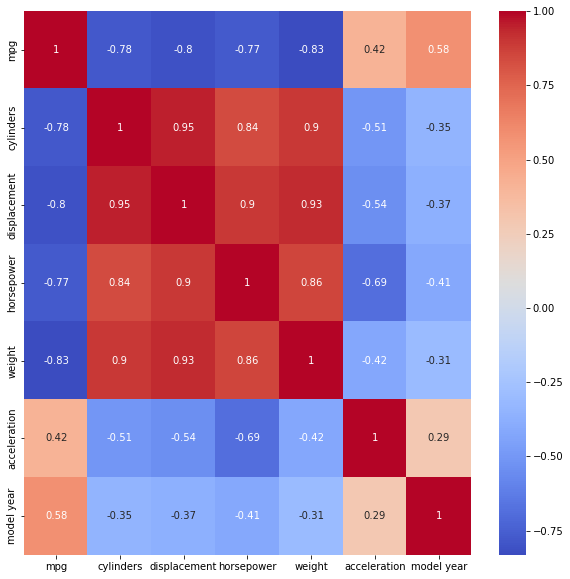

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

> That was surprising actually most of the data are correlated with each other either postive correlation or negative:
- There is a very high positive correlation between [cylinders, displacement, horsepower, weight] and all that four attributes have high negative correlation with `mpg` attribute.

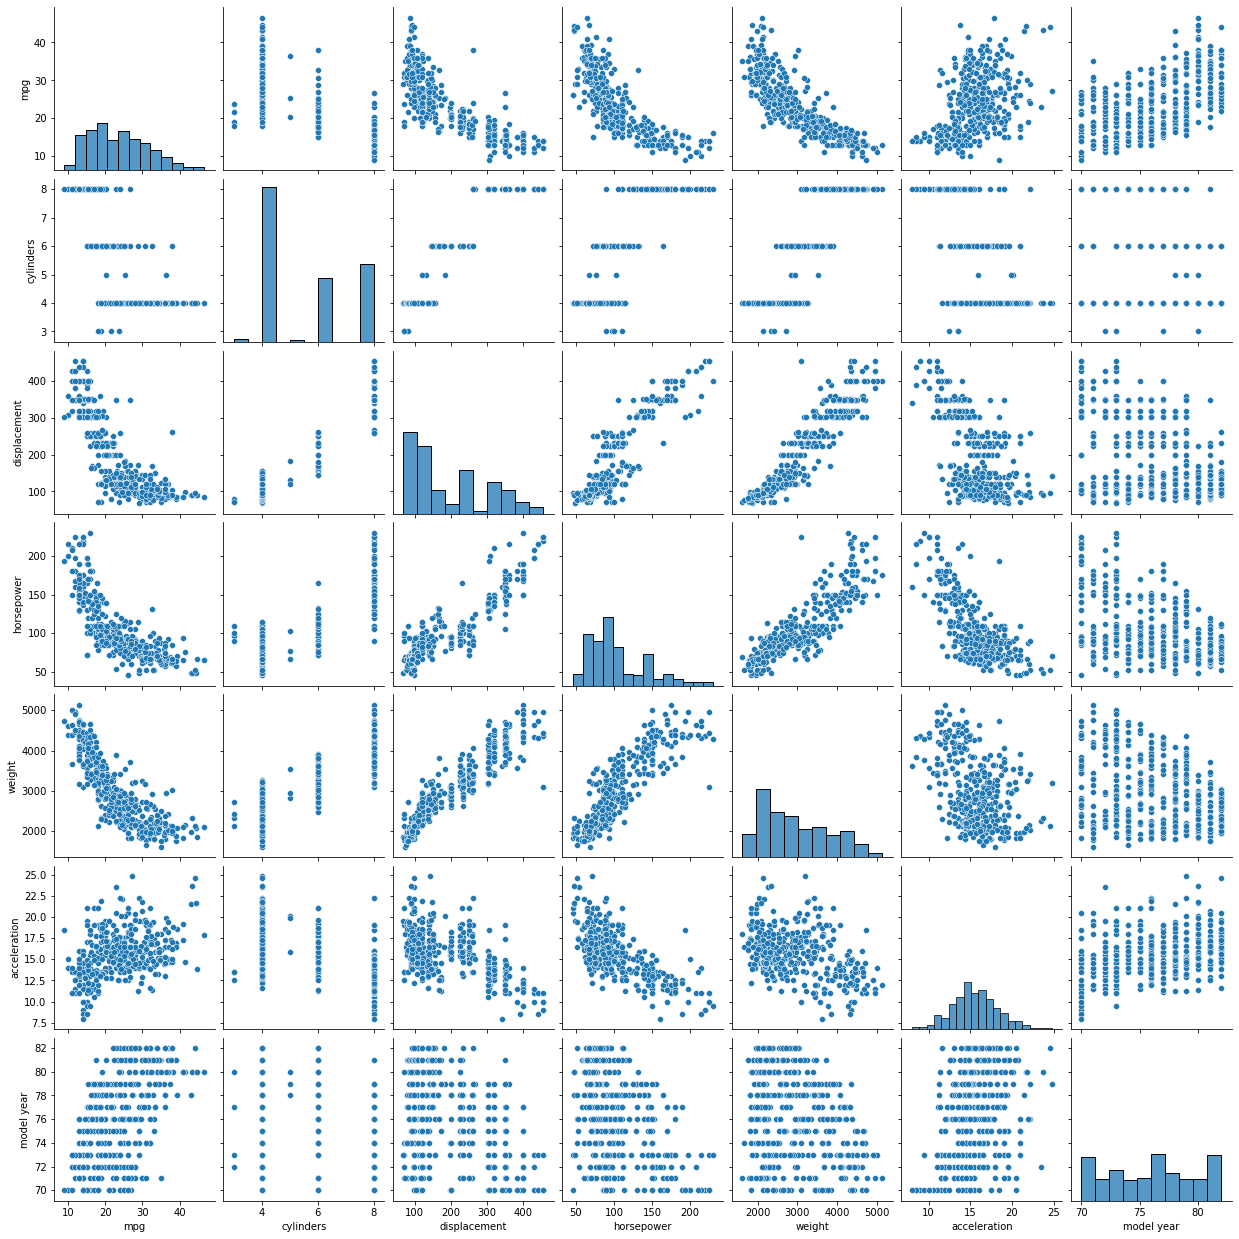

In [20]:
sns.pairplot(df)

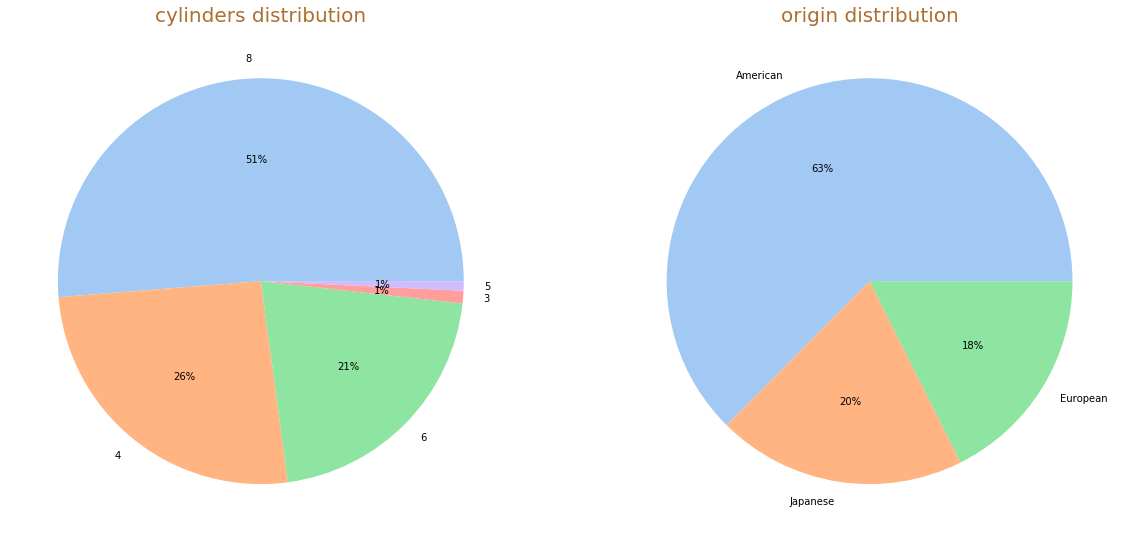

In [19]:
attr = ['cylinders', 'origin']
fig, ax =plt.subplots(1,2, figsize=(20,20))
colors = sns.color_palette('pastel')

for i,k in enumerate(attr):
    fig.sca(ax[i])
    plt.pie(df[k].value_counts(), labels = df[k].unique(), colors = colors, autopct='%.0f%%')
    plt.title(f"{k} distribution", color= '#AC6F2E', size = 20)

In [29]:
df['cylinders'] = df['cylinders'].replace([3, 5], df['cylinders'].mode()[0])

In [30]:
df['cylinders'].value_counts()

4    211
8    103
6     84
Name: cylinders, dtype: int64

#### Here are my first thoughts:
> Origin distribution: Three out of every five cars were manufactured in the USA.

> Cylinders distribution: You can clearly see that it has 5 unique values [3, 4, 5, 6, 8]
> There is no 7 cylinder engine in the dataset and according to the above chart, both 3 and 5 cylinder engine are rare. There is something with engines with odd number of cylinders. 
> I googled it and found that it's not preferable for cars because straight engines with an odd number of cylinders are inherently unbalanced because there are always an odd number of pistons moving in one direction while a different number move the opposite direction.

> I replaced the 3 and 5 with the mode in `cylinders` attribute as their limited values will affect the insights.

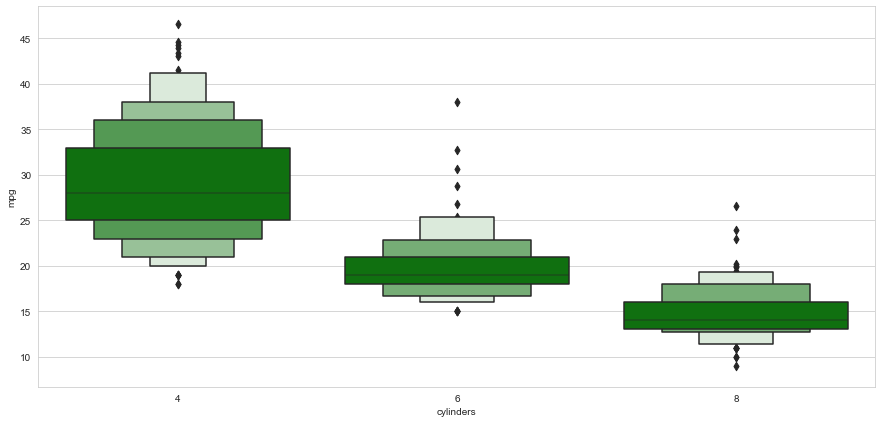

In [38]:
plt.figure(figsize=(15,7))
sns.boxenplot(x='cylinders', y="mpg", color="g", data=df,scale= 'linear', width = .8)
plt.show()

> The more the cylinders, the less the mpg

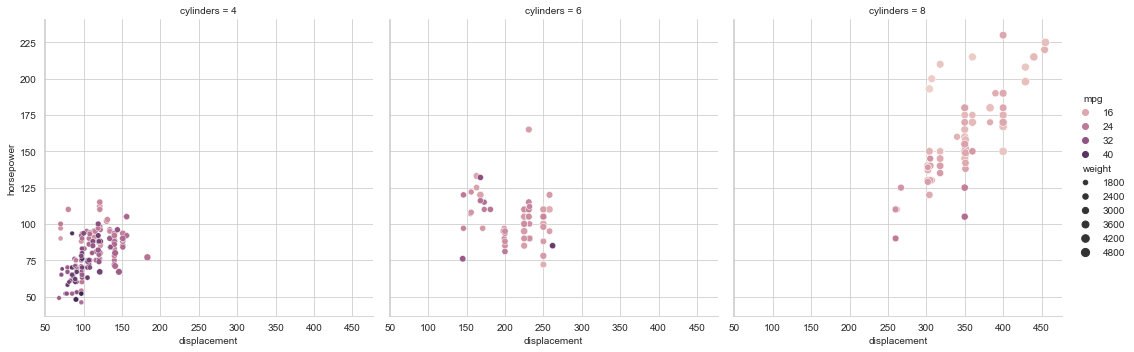

In [93]:
sns.relplot(data=df, x= 'displacement', y= 'horsepower', hue= 'mpg', size='weight', col= 'cylinders')
plt.show()

> As expected:
- cars with 8 cylinders weight more than 6 and of course more than 4 cylinder cars.
- The more `cylinders` the engine has, the larger the overall `displacement` and `horsepower` and surprisingly less `mpg`.

In [ ]:
sns.relplot(data=df, x= 'displacement', y= 'horsepower', hue= 'mpg', size='weight', col= 'origin')
plt.show()

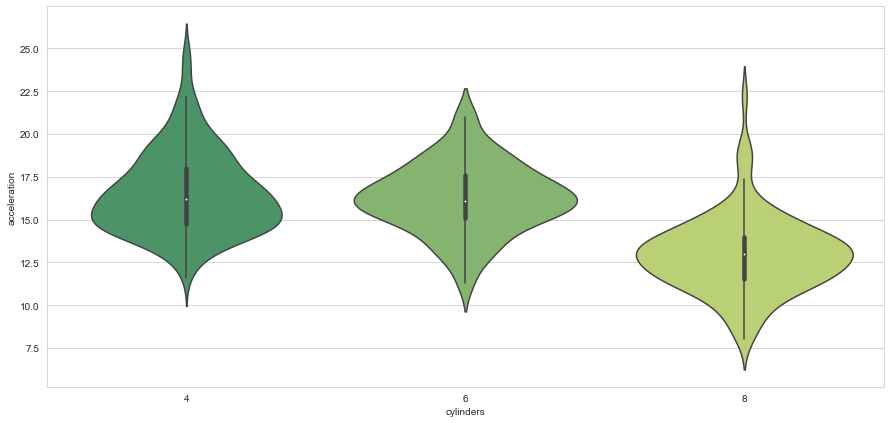

In [94]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df["cylinders"], y=df["acceleration"], palette='summer')

> First let me clarify that less `acceleration` value is better, faster car, and as we can see here cars with 8 cylinders have lower acceleration time to go from 0 to 60 mph

In [83]:
def regplot(x, y='mpg'):    
    plt.figure(figsize=(15,7))
    sns.regplot(x=df[x], y=df[y])

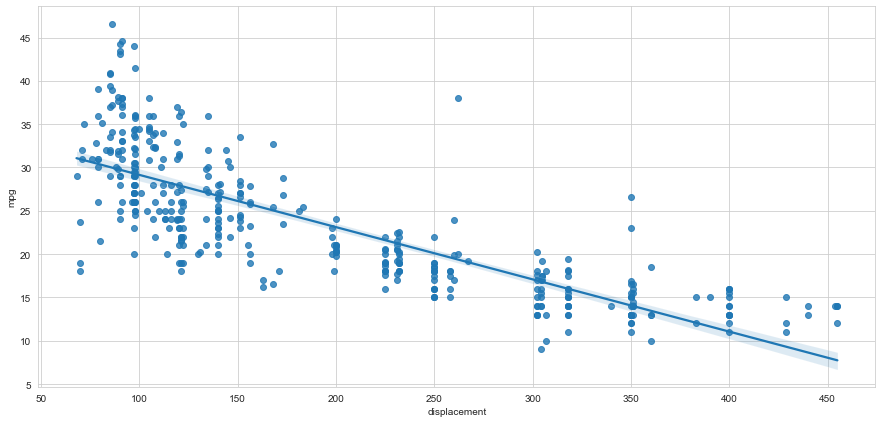

In [84]:
regplot('displacement')

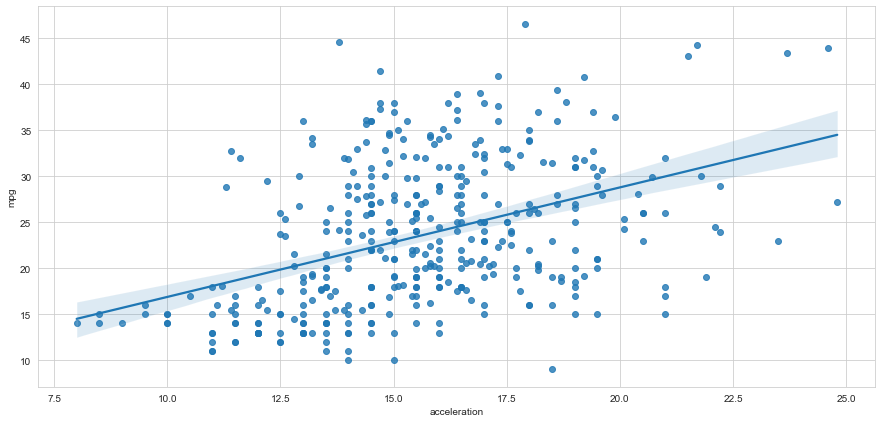

In [86]:
regplot('acceleration')

> when you drive at low speed ,high acceleration value, you consume more fuel `mpg` and of course that means large displacement and lower cylinders

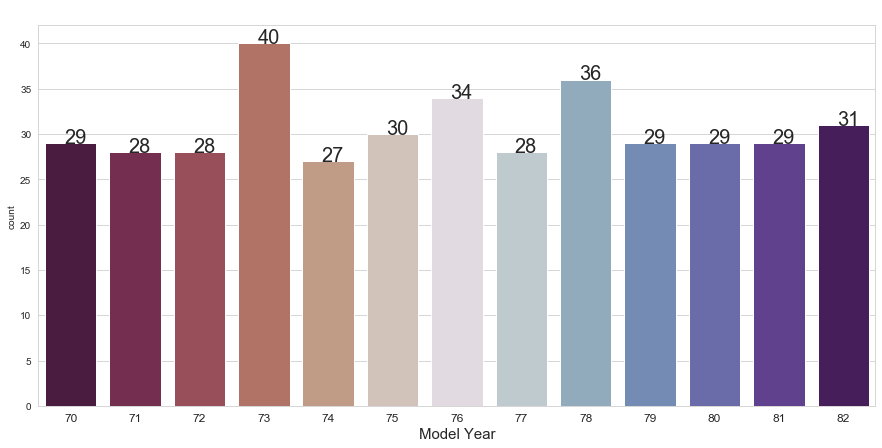

In [75]:
plt.figure(figsize=(15,7))
ax1 = sns.countplot(data=df, x='model year', palette='twilight_shifted_r')
plt.xlabel('Model Year', size= 15)
plt.xticks(size=12)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), size=20)

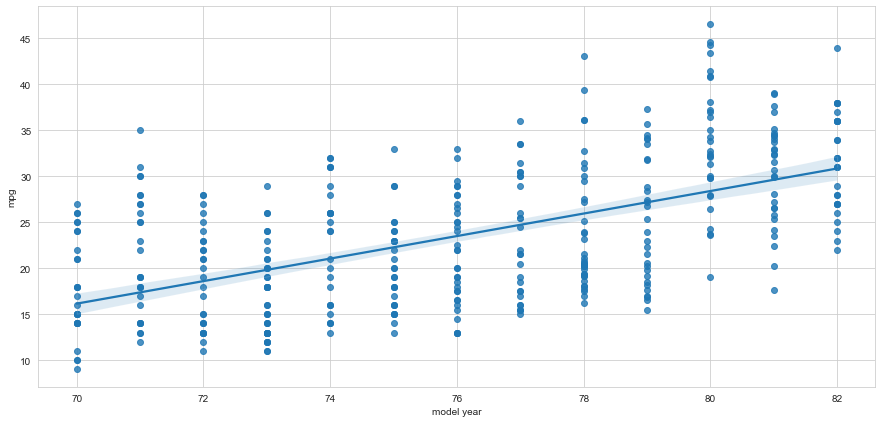

In [92]:
regplot('model year')

> Year by year cars get more improvements and that consumes more `mpg` but not in a severe level.